#importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##reading the data

In [4]:
data=pd.read_csv("C:/Users/Kavya/Downloads/hotel_bookings 2.csv")

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [20]:
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

In [7]:
data.shape

(119390, 32)

In [8]:
#checking for null columns
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
data.drop(['agent','company'],axis=1,inplace=True)
data.dropna(inplace=True)

In [10]:
data.shape

(118898, 30)

In [16]:
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       7
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                      

In [15]:
data.describe(include=['O']).T

,count,unique,top,freq
hotel,118898,2,City Hotel,79302
arrival_date_month,118898,12,August,13852
meal,118898,5,BB,91863
country,118898,177,PRT,48586
market_segment,118898,7,Online TA,56402
distribution_channel,118898,5,TA/TO,97730
reserved_room_type,118898,10,A,85601
assigned_room_type,118898,12,A,73863
deposit_type,118898,3,No Deposit,104163
customer_type,118898,4,Transient,89174


In [22]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [24]:
for i in data.describe(include=['O']):
    print(f'the unique values in feature {i} is:',data[i].unique(),sep= '\n')
    print('-------------------------------------------------------------------')

the unique values in feature hotel is:
['Resort Hotel' 'City Hotel']
-------------------------------------------------------------------
the unique values in feature arrival_date_month is:
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-------------------------------------------------------------------
the unique values in feature meal is:
['BB' 'FB' 'HB' 'SC' 'Undefined']
-------------------------------------------------------------------
the unique values in feature country is:
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV'

In [31]:
##Visualization
#UNIVARIATE ANALYSIS

In [27]:
cancelled_perc=data['is_canceled'].value_counts(normalize=True)
cancelled_perc

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

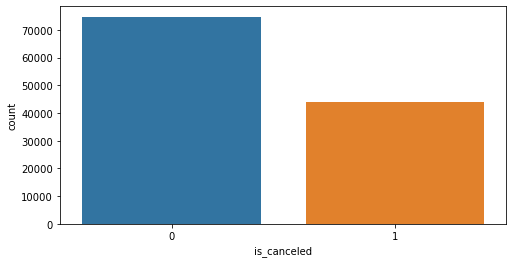

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(data['is_canceled'])
plt.show()

In [30]:
##Insight: from above,it is clear that the booking cancelled  count is almost half the booking not-cancelled count.

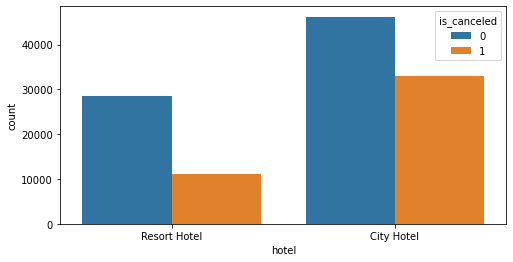

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(data['hotel'],hue='is_canceled',data=data)
plt.show()

In [35]:
##In Resort Hotel the not-canceled count is more than double the cancellation count
#In City Hotel the boookings are high and,cancellations are also high.

In [37]:
city_hotel=data[data['hotel']=='City Hotel']
city_hotel.is_canceled.value_counts(normalize=True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

In [38]:
resort_hotel=data[data['hotel']=='Resort Hotel']
resort_hotel.is_canceled.value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

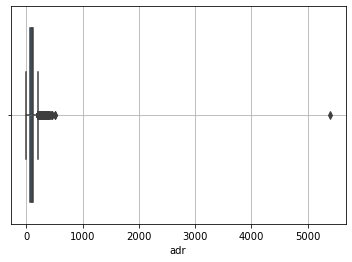

In [39]:
sns.boxplot(data['adr'])
plt.grid('False')

In [40]:
data=data[data['adr']<5000]

In [41]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

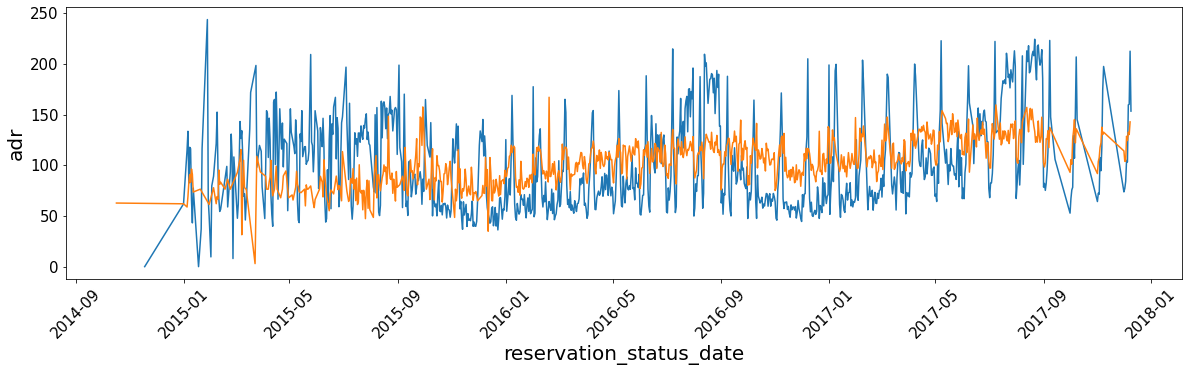

In [48]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='reservation_status_date',fontsize=20)
plt.ylabel(ylabel='adr',fontsize=20)
plt.plot(resort_hotel.index,resort_hotel['adr'],label=resort_hotel)
plt.plot(city_hotel.index,city_hotel['adr'],label=city_hotel)

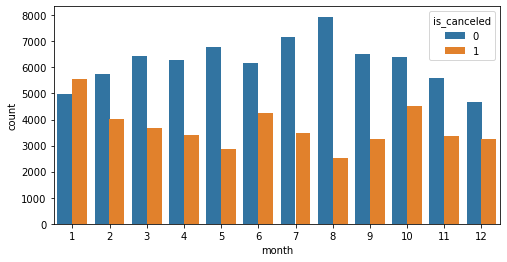

In [49]:
data['month']=pd.DatetimeIndex(data['reservation_status_date']).month
plt.figure(figsize=(8,4))
sns.countplot(x='month',hue='is_canceled',data=data)
plt.show()

In [50]:
##from the above,in 8th month the bookings are maximum and cancellaetion rate is very less,in the 1st month the number of bookings are very less but cancellation rates are very high.

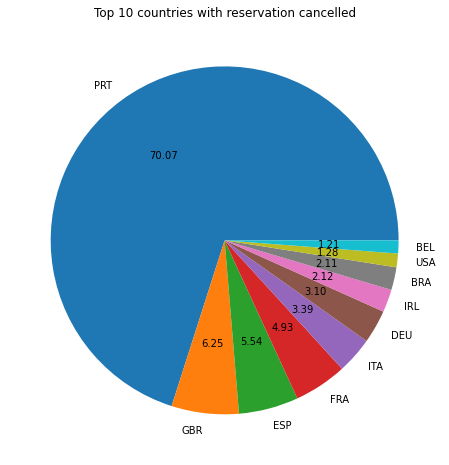

In [57]:
cancelled_data=data[data['is_canceled']==1]
top_10_countries=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(10,8))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(top_10_countries,autopct='%.2f',labels=top_10_countries.index)
plt.show()

In [58]:
## from the above pie chart it is clear that portugal has the highest number of cancellations.

In [59]:
data['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [60]:
## The maximum number of bookings are made by online only

In [65]:
data['deposit_type'].value_counts()

No Deposit    104163
Non Refund     14572
Refundable       162
Name: deposit_type, dtype: int64

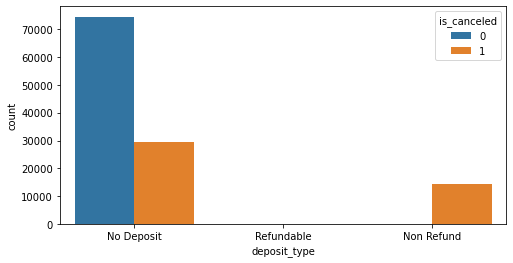

In [67]:

plt.figure(figsize=(8,4))
sns.countplot(data['deposit_type'],hue='is_canceled',data=data)
plt.show()

In [68]:
## bookings and cancellations are more in No deposit method.

##CONCLUSION

1. compared to resort hotel, city hotel have more bookings. It is possible that the resort hotels are more expensive than      the city hotels.
2. we can see there is no clear connection with weekdays or weekends with cancellation.
3. In the month of August the bookings are high and the cancellations are more,whereas in january month the bookings are      very low and cancellations are high.
4. The cancellations are more when the prices are high.
5. Bookins are more with the online TA(Travel Agents) followed by offline TA.
6. In the PRT(Portugal) country the cancellation percentage is much higher almost 70%.
7. Higher Prices leads to cancellations.

##SUGGESTIONS
1. To prevent the cancellations of reservations,the hotels can lower the prices of hotels based on the location or can        provide discounts to the customers.
2. As,in the January month the cancellations are more,the hotels in order to increase their revenue they can arrange some      activities,or can introduce New Year discounts.
3. The hotels,specially the Resort Hotel can provide some discount on holidays or weekends,or on some bulk bookings to        increase their rate of reservations.
4. They can increase the quality and services of the hotel in PRT portugal country to reduce the cancellations.
5. Finally, the can work on their websites to be more attractive to the customers because,majority of bookings are done by    online only.
6. To reduce the cancellations,they can implement non_refundable deposit schems as well.